<a href="https://colab.research.google.com/github/doofenshirmtz/doofenshirmtz/blob/main/mlp_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
1+1

2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


#normalize

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

num_classes=10

In [ ]:
model = Sequential([
    # Flatten the 28x28 image into a 784-element vector (28 * 28 = 784)
    Flatten(input_shape=(28, 28)),

    # Hidden Layer 1: Fully connected layer with ReLU activation
    Dense(512, activation='relu'),
    Dropout(0.2), # Regularization to prevent overfitting

    # Hidden Layer 2: A slightly smaller fully connected layer
    Dense(256, activation='relu'),
    Dropout(0.2),

    # Output Layer: 10 units for the 10 classes, Softmax for probability output
    Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8555 - loss: 0.4715 - val_accuracy: 0.9671 - val_loss: 0.1059
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9664 - loss: 0.1113 - val_accuracy: 0.9751 - val_loss: 0.0807
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9761 - loss: 0.0779 - val_accuracy: 0.9745 - val_loss: 0.0752
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9815 - loss: 0.0575 - val_accuracy: 0.9766 - val_loss: 0.0775
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9851 - loss: 0.0448 - val_accuracy: 0.9791 - val_loss: 0.0693


In [ ]:
# Evaluating
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]*100:.2f}%')

Test loss: 0.0693
Test accuracy: 97.91%


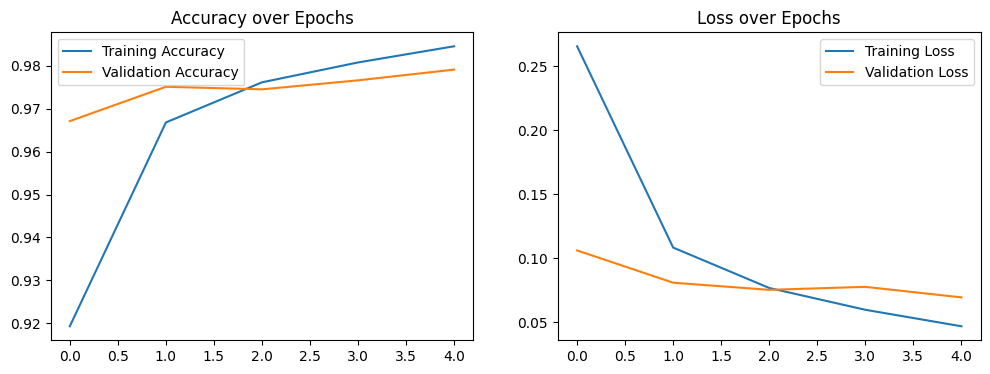

In [ ]:
import matplotlib.pyplot as plt

#visualizing losses and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [ ]:

test_image = x_test[504]
true_label = y_test[504]

input_for_prediction = test_image[np.newaxis, ...]


predictions = model.predict(input_for_prediction)

predicted_label = np.argmax(predictions)

print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
True Label: 1
Predicted Label: 1
